In [ ]:
Data Import

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\ppulivarthi\AV_Hackthons\HR_Analytics\train_LZdllcl.csv')

In [2]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001856D91DD68>,
      dtype=object)

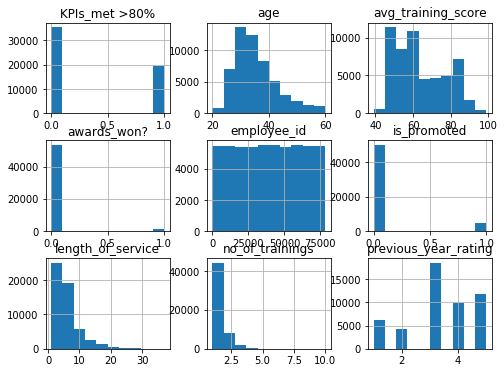

In [6]:
df.hist(figsize=(8,6))

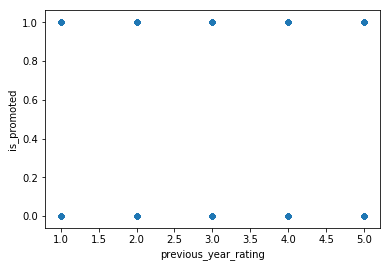

In [7]:
df.plot.scatter(x='previous_year_rating',y='is_promoted')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
# Splitting X and y
X=df[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']]

In [9]:
y=df[['is_promoted']]

In [11]:
X.shape

(54808, 13)

In [ ]:
# Data cleaning
#Step1:checking and deleting the null data
df_null=df[~df.isnull().any(axis=1)]

In [1]:

# Feature engineering
from sklearn.feature_selection import SelectKBest, chi2
bestfeature=SelectKBest(score_func=chi2,k=10)
fit=bestfeature.fit(X,y)
df_chi_score=pd.DataFrame(fit.scores_)
df_p_score=pd.DataFrame(fit.pvalues_)
df_columns=pd.DataFrame(X.columns)
feature_score=pd.concat([df_columns,df_chi_score,df_p_score],axis=1)
feature_score.columns=['features','chi_score','P_score']
# feature_score
feature_score.sort_values(by=['chi_score'],ascending=False,inplace=True)

NameError: name 'X' is not defined

In [ ]:
feature_score

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression(solver='lbfgs',multi_class='auto')

In [15]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'sourcing'

In [ ]:
y_pred = model.predict(X_test)
print("clss",accuracy_score(y_pred,y_test))
print("clss",classification_report(y_pred,y_test))

print("confusion_matrix",confusion_matrix(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))
